In [97]:
import pandas as pd
import numpy as np

In [98]:
temp_df = pd.read_csv('IMDB Dataset.csv')

**1. Data Gathering**

In [99]:
df = temp_df.iloc[:10000]

In [100]:
df.shape

(10000, 2)

In [101]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


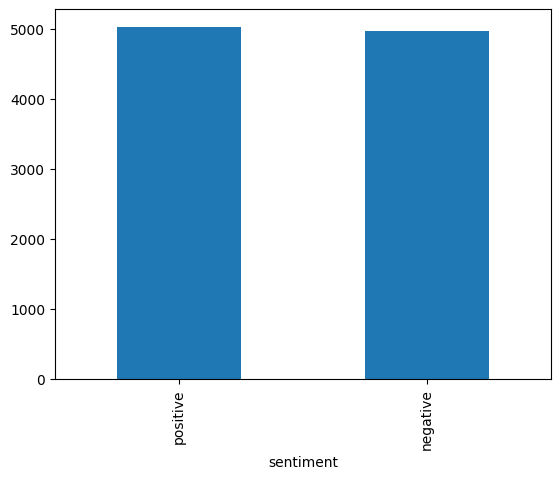

In [102]:
import matplotlib.pyplot as plt
df.sentiment.value_counts().plot(kind='bar')
plt.show()

**Almost looks balanced**

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


**No missing values.**

In [104]:
df.duplicated().sum()

np.int64(17)

In [105]:
#removing duplicates
df.drop_duplicates(inplace=True)

/tmp/ipython-input-105-3434901942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df['review'][40]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. <br /><br />This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. <br /><br />If you are looking for mindless entertainment, I still wouldn't recommend this movie."

**2.Text preprocessing**

*  Removing html tags
*  Lowering Casing
*  Removing punctuations
*  Removing stopwords



In [108]:
#removing html tags
import re
def remove_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)


In [109]:
df['review'] = df['review'].apply(remove_tags)

/tmp/ipython-input-109-2336150696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [110]:
df['review'][40]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. If you are looking for mindless entertainment, I still wouldn't recommend this movie."

In [111]:
#lowercasing
df['review'] = df['review'].str.lower()

/tmp/ipython-input-111-3697047252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()


In [112]:
df['review'][40]

"it had all the clichés of movies of this type and no substance. the plot went nowhere and at the end of the movie i felt like a sucker for watching it. the production was good; however, the script and acting were b-movie quality. the casting was poor because there were good actors mixed in with crumby actors. the good actors didn't hold their own nor did they lift up the others. this movie is not worthy of more words, but i will say more to meet the minimum requirement of ten lines. james wood and cuba gooding, jr. play caricatures of themselves in other movies. if you are looking for mindless entertainment, i still wouldn't recommend this movie."

In [113]:
#removing punctuations
import string
exclude = string.punctuation
def remove_punctuations(text):
  return text.translate(str.maketrans('','',exclude))


df['review'] = df['review'].apply(remove_punctuations)

/tmp/ipython-input-113-2433199629.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_punctuations)


In [114]:
df['review'][40]

'it had all the clichés of movies of this type and no substance the plot went nowhere and at the end of the movie i felt like a sucker for watching it the production was good however the script and acting were bmovie quality the casting was poor because there were good actors mixed in with crumby actors the good actors didnt hold their own nor did they lift up the others this movie is not worthy of more words but i will say more to meet the minimum requirement of ten lines james wood and cuba gooding jr play caricatures of themselves in other movies if you are looking for mindless entertainment i still wouldnt recommend this movie'

In [115]:
#removing stopwords as not much useful in sentiment analysis
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in list]).apply(lambda x:" ".join(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-115-3557183007.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in list]).apply(lambda x:" ".join(x))


In [116]:
df['review'][40]

'clichés movies type substance plot went nowhere end movie felt like sucker watching production good however script acting bmovie quality casting poor good actors mixed crumby actors good actors didnt hold lift others movie worthy words say meet minimum requirement ten lines james wood cuba gooding jr play caricatures movies looking mindless entertainment still wouldnt recommend movie'

**Train Test Split**

In [117]:
X = df['review']
y = df['sentiment']

In [118]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y = lb.fit_transform(y)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**3.Text Vectorization - using embeddings**

In [188]:
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)


X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

72425

In [122]:
#padding all reviews to fix length 100
X_train = pad_sequences(X_train,padding='post',maxlen=100)
X_test = pad_sequences(X_test,padding='post',maxlen=100)

In [123]:
print(X_train.shape)
print(X_test.shape)


(7986, 100)
(1997, 100)


In [124]:
#Using Glove word embeddings and create an embedding dictonary
'''
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()'''

'\nfrom numpy import asarray\nfrom numpy import zeros\n\nembeddings_dictionary = dict()\nglove_file = open(\'a2_glove.6B.100d.txt\', encoding="utf8")\n\nfor line in glove_file:\n    records = line.split()\n    word = records[0]\n    vector_dimensions = asarray(records[1:], dtype=\'float32\')\n    embeddings_dictionary [word] = vector_dimensions\nglove_file.close()'

In [125]:
 # Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.
'''
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        '''

'\nembedding_matrix = zeros((vocab_length, 100))\nfor word, index in word_tokenizer.word_index.items():\n   embedding_vector = embeddings_dictionary.get(word)\n   if embedding_vector is not None:\n       embedding_matrix[index] = embedding_vector\n       '

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,LSTM,Dense,Dropout,Flatten

In [193]:
#creating our own custom embeddings instead of word2vec or glove word embeddings.


#vocab_length = len(word_tokenizer.word_index) + 1
#fixing vocab length to top 10k words
vocab_length = 10000

model = Sequential()
model.add(Embedding(vocab_length,100))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.02))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5473 - loss: 0.6778 - val_accuracy: 0.6775 - val_loss: 0.6220
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7139 - loss: 0.5758 - val_accuracy: 0.8042 - val_loss: 0.4845
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8541 - loss: 0.3500 - val_accuracy: 0.8343 - val_loss: 0.4054
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9226 - loss: 0.2248 - val_accuracy: 0.8363 - val_loss: 0.4724
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9466 - loss: 0.1745 - val_accuracy: 0.8463 - val_loss: 0.4740
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9612 - loss: 0.1294 - val_accuracy: 0.8327 - val_loss: 0.5002
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9688 - loss: 0.1105 - val_accuracy: 0.8388 - val_loss: 0.5134
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9777 - loss: 0.0864 - val_accu